In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from PCA_utils import plot_gallary
%matplotlib inline
from numpy import linalg as LA

## Eigen Picture Implementation

In [2]:
class EigenPic:
    def __init__(self,n_comp):
        """
        n_comp is the number of PCA components you need
        """
        self.n_comp = n_comp
        
    def _covariance(self,X):
        """
        TODO:
        1. _X is the original data with shape (n,m), n is the number of observations and m is the number of features
        2. Finish this function to calculate the covariance matrix, which has shape (m,m)
        3. Using np.cov() is NOT ALLOWED (otherwise 5 points off)
                
        """
        mean = X - (np.mean(X,axis=1).reshape(X.shape[0],1))
        tmp = np.dot(mean.T, mean)
        tmp = (tmp + np.conj(tmp))/2.
        cov_X = tmp/(X.shape[1]-1)
        
        return cov_X
    
    def _eigs(self,cov_X):
        """
        TODO:
        1. conduct eigen decomposition of the covariance matrix of X cov_X
        """
        #avoid complex number
        eva, evec = LA.eigh(cov_X)
        eigval = np.flip(eva,0)
        eigvec = np.flip(evec,1)
        return eigval, eigvec
    
    def fit(self,X):
        _covX = self._covariance(X)
        self.eigval, self.eigvec = self._eigs(_covX)
        """
        TODO:
        1. get the eigen pictures
        
        """
        n_comp = self.n_comp
        eigval = self.eigval[:n_comp]
        eigen_pics = self.eigvec[:,:n_comp]
        print(eigen_pics.shape)
        return eigen_pics
    
    def explained_variance_ratio(self):
        """
        TODO:
        1. calculate the variance explained by n_comp PCA components
        """
        n_comp = self.n_comp
        total_sum = np.sum(self.eigval)
        eigval = self.eigval[:n_comp]
        n_sum = np.sum(eigval)
        var_ratio = n_sum/total_sum
        return var_ratio

## MNIST data

(60000, 784)
(60000,)


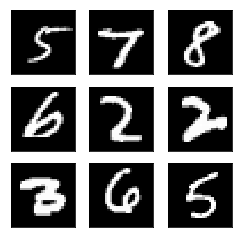

In [33]:
npz_file = np.load('MNIST/mnist_arr.npz')
img_arr = npz_file['images']
img_lbl_arr = npz_file['labels']
print(img_arr.shape)
print(img_lbl_arr.shape)
plot_gallary(img_arr[np.random.choice(range(img_arr.shape[0]), size = 9)].reshape(-1, 28,28))

In [60]:
# Run this block to get the 9 PCs for digit 6
n = 9
pca_cls = EigenPic(n)
pc_n = pca_cls.fit(img_arr[(img_lbl_arr == 6)])

(784, 9)


In [61]:
var_ratio = pca_cls.explained_variance_ratio()
print('variance explained by the first %d components is %.4f'%(n_comp, var_ratio))

variance explained by the first 9 components is 0.7596


### Plot eigen pictures for the first 9 eigen digits of the number 6

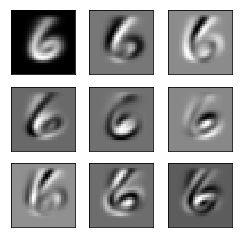

In [62]:
plot_gallary(pc_n.T.reshape(-1, 28, 28))

## Face data

(3023, 1850)


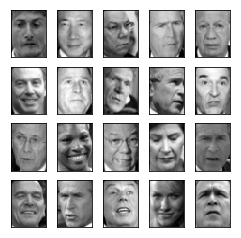

In [14]:
npz_file = np.load('MNIST/face_data.npz')
face_arr = npz_file['images']
h, w = 50, 37
print(face_arr.shape)
n_comp_face = 50
plot_gallary(face_arr[np.random.choice(range(face_arr.shape[0]), size = n_comp_face)].reshape(-1, h, w))

In [20]:
value = [5,10,15,20,30,40,60,80,100,120,140,160]
ratio = []
for n_comp_face in value:
    pca_cls = EigenPic(n_comp_face)
    pc_face = pca_cls.fit(face_arr)
    var_ratio = pca_cls.explained_variance_ratio()
    ratio.append(var_ratio)
    print('variance explained by the first %d components is %.4f'%(n_comp_face, var_ratio))

(1850, 5)
variance explained by the first 5 components is 0.5862
(1850, 10)
variance explained by the first 10 components is 0.6772
(1850, 15)
variance explained by the first 15 components is 0.7319
(1850, 20)
variance explained by the first 20 components is 0.7683
(1850, 30)
variance explained by the first 30 components is 0.8146
(1850, 40)
variance explained by the first 40 components is 0.8446
(1850, 60)
variance explained by the first 60 components is 0.8844
(1850, 80)
variance explained by the first 80 components is 0.9092
(1850, 100)
variance explained by the first 100 components is 0.9268
(1850, 120)
variance explained by the first 120 components is 0.9398
(1850, 140)
variance explained by the first 140 components is 0.9495
(1850, 160)
variance explained by the first 160 components is 0.9572


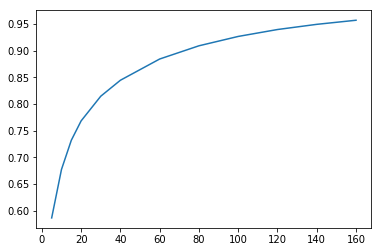

In [21]:
from matplotlib import pyplot as plt
plt.plot(value,ratio)
plt.show()

### Plot the first 9 eigen faces. Do you see any familiar faces?

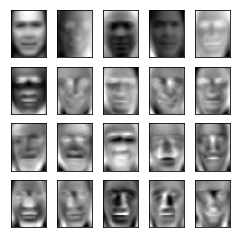

(20, 50, 37)


In [12]:
plot_gallary(pc_face.T.reshape(-1, h, w))
print(pc_face.T.reshape(-1, h, w).shape)

In [13]:
pc_face.T.shape

(20, 1850)